### Dependencies

Make sure you install all the required libraries to be able to run this notebook. If you already have these dependencies you can skip this step.

Download [covid](https://covid.ourworldindata.org/data/owid-covid-data.csv) dataset and place it into the same directory where the notebook is.

In [ ]:
pip install matplotlib numpy seaborn sklearn pandas

### Question 1
Which countries have ICU patients and how they changed over time?

#### Reading data
The first thing we do is we read data from the file.

In [1]:
import pandas as pd

df = pd.read_csv('owid-covid-data.csv', keep_default_na=False)
# Remove the column display limit
pd.set_option('display.max_columns', None)

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])
df['icu_patients'] = pd.to_numeric(df['icu_patients'])

df.head()

C:\Users\arman\AppData\Local\Temp\ipykernel_12380\3121584888.py:3: DtypeWarning: Columns (4,5,7,8,10,11,13,14,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('owid-covid-data.csv', keep_default_na=False)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0,0,,0,0,,0.0,0.0,,0.0,0.0,,,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.0,54.422,18.6,2.581,1.337,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.511,41128772,,,,
1,AFG,Asia,Afghanistan,2020-01-06,0,0,,0,0,,0.0,0.0,,0.0,0.0,,,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.0,54.422,18.6,2.581,1.337,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.511,41128772,,,,
2,AFG,Asia,Afghanistan,2020-01-07,0,0,,0,0,,0.0,0.0,,0.0,0.0,,,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.0,54.422,18.6,2.581,1.337,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.511,41128772,,,,
3,AFG,Asia,Afghanistan,2020-01-08,0,0,,0,0,,0.0,0.0,,0.0,0.0,,,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.0,54.422,18.6,2.581,1.337,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.511,41128772,,,,
4,AFG,Asia,Afghanistan,2020-01-09,0,0,,0,0,,0.0,0.0,,0.0,0.0,,,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.0,54.422,18.6,2.581,1.337,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.511,41128772,,,,


#### Countries
Here we find all the countries which had ICU patients.

In [2]:
# Filter dataframe where icu_patients is not NaN
countries_icu_patients = df[df['icu_patients'].notna()]

# Filter by location unique
countries = countries_icu_patients['location'].unique()
all_countries = df['location'].unique()
print(countries, len(countries))
print(f"There are {len(countries)} out of {len(all_countries)} countries with ICU patients")

['Algeria' 'Argentina' 'Australia' 'Austria' 'Belgium' 'Bolivia'
 'Bulgaria' 'Canada' 'Chile' 'Cyprus' 'Czechia' 'Denmark' 'England'
 'Estonia' 'Finland' 'France' 'Germany' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta' 'Netherlands'
 'Northern Ireland' 'Portugal' 'Romania' 'Scotland' 'Serbia' 'Slovakia'
 'Slovenia' 'South Africa' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'United Kingdom' 'United States' 'Wales'] 42
There are 42 out of 255 countries with ICU patients


There are 42 countries that have ICU patients out of 255.

#### Visualization
We will try to visualize how ICU patients change over time in each country using line plot

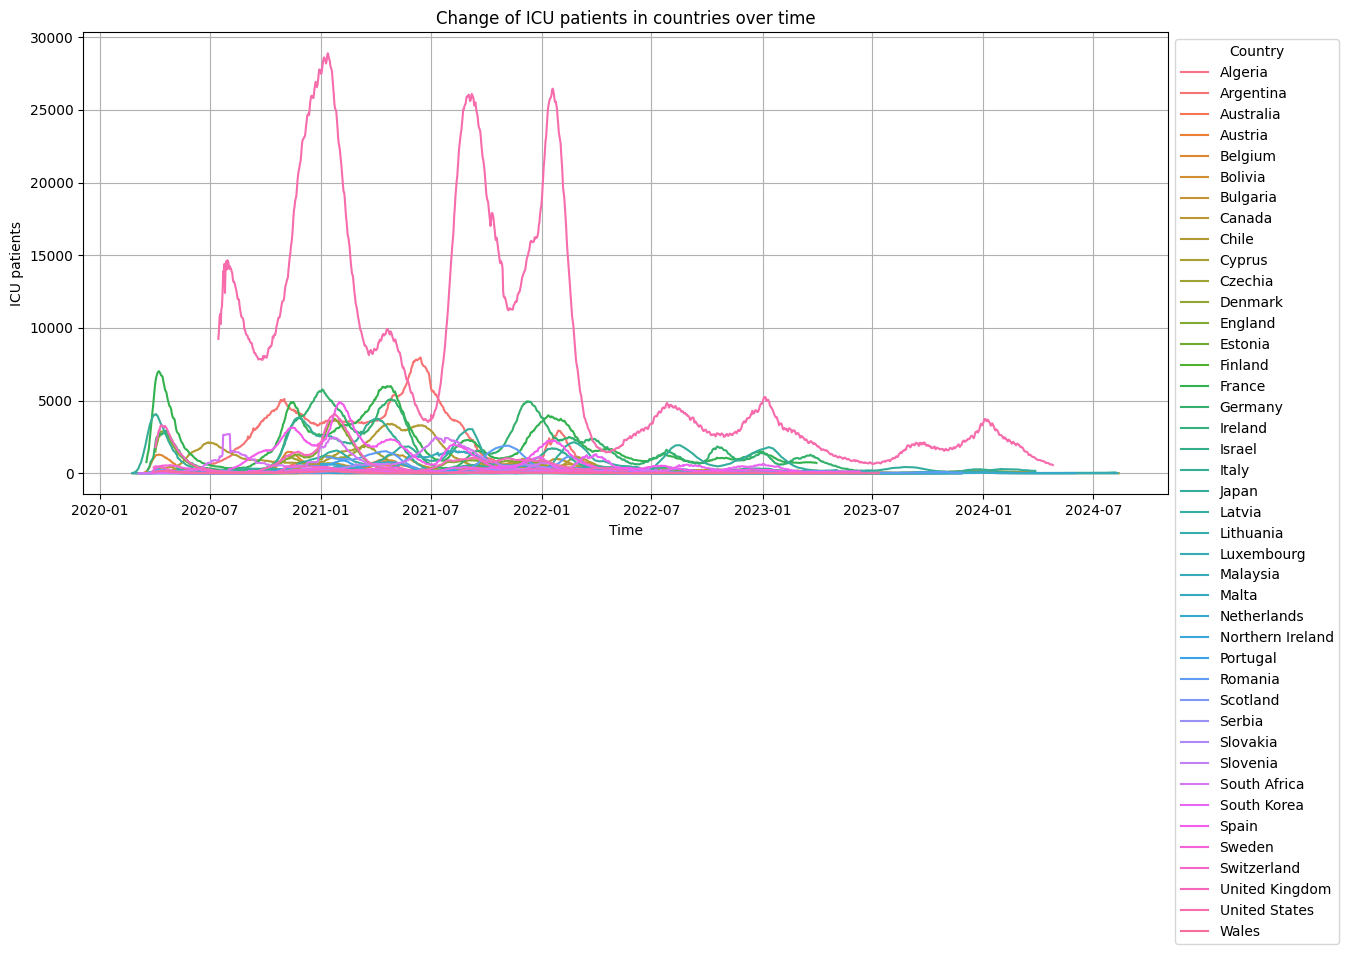

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by country and date and sum the patients (or use another aggregation method)
grouped_countries = countries_icu_patients.groupby(['location', 'date'])['icu_patients'].sum().reset_index()

# Create a figure for plotting
plt.figure(figsize=(14, 6))

# Use seaborn to plot for each country
sns.lineplot(data=grouped_countries, x='date', y='icu_patients', hue='location')

# Add legend
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')

# Add titles and labels
plt.title('Change of ICU patients in countries over time')
plt.xlabel('Time')
plt.ylabel('ICU patients')
plt.grid()

There are just too many countries so it's quite difficult to see all the values. So we will visualize the top 5 and the bottom 5.

First we count all the ICU patients in each country to get the total value of ICU patients in each country. Then we will sort them in a descending order. After that, We will take the first 5 and the bottom 5 and create new data frames.

In [4]:
AMOUNT = 5

# Get total ICU patients in each country sorted
total_countries_sorted = countries_icu_patients.groupby(['location'])['icu_patients'].sum().reset_index().sort_values(by='icu_patients', ascending=False)

# Take the first 5 for top countries
top_countries = total_countries_sorted[:AMOUNT]

# Take the last 5 for bottom countriesa
bottom_countries = total_countries_sorted[-AMOUNT:]

top_countries_values = grouped_countries[grouped_countries['location'].isin(top_countries['location'])]
rest_countries_values = grouped_countries[grouped_countries['location'].isin(bottom_countries['location'])]


We create two subplots and in the first one we display the first portion of data with higher values and in the second we display data with lower ICU patients values.

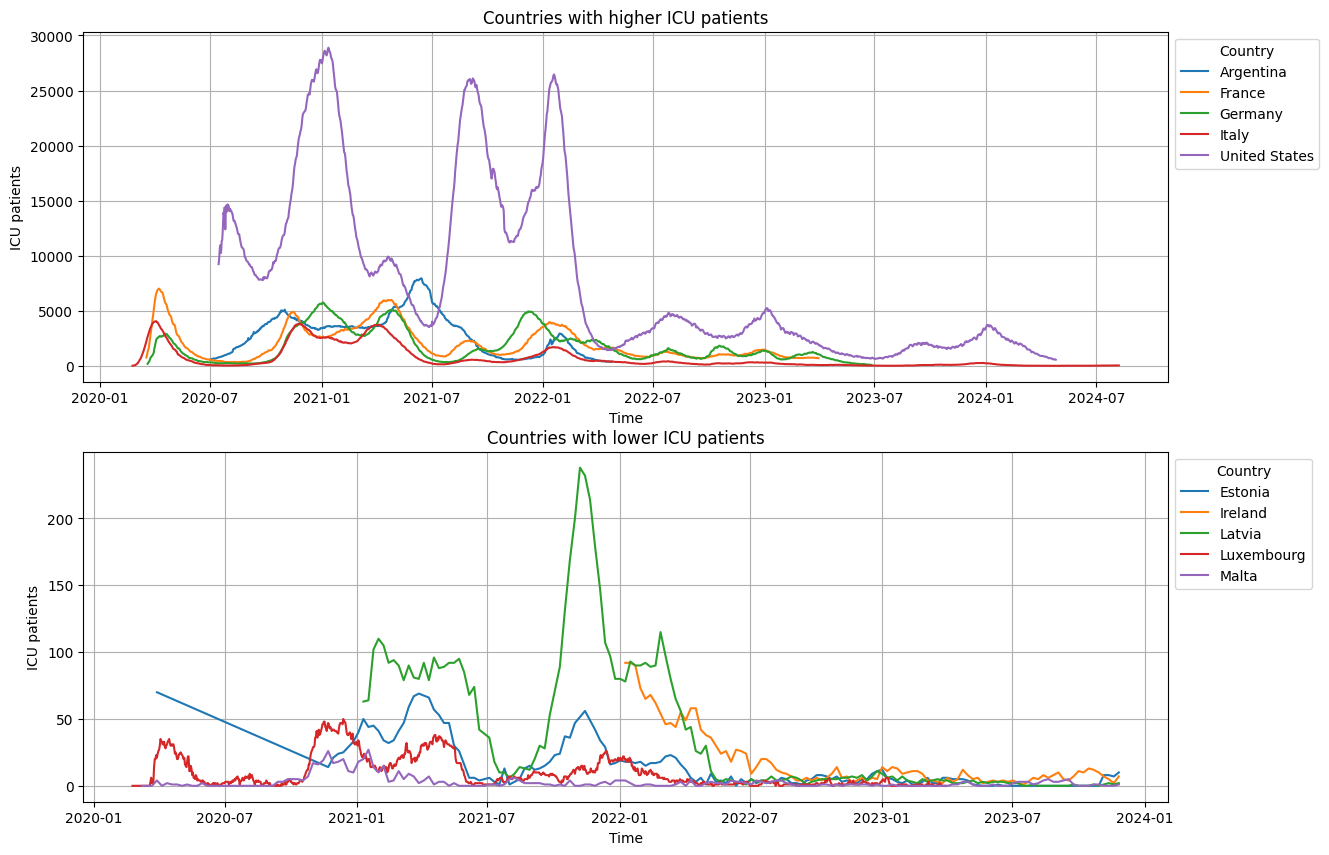

In [5]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Use seaborn to plot top countries values
sns.lineplot(ax=axes[0], data=top_countries_values, x='date', y='icu_patients', hue='location')

axes[0].set_title('Countries with higher ICU patients')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('ICU patients')
axes[0].legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')
axes[0].grid()

# Use seaborn to plot rest countries values
sns.lineplot(ax=axes[1], data=rest_countries_values, x='date', y='icu_patients', hue='location')

axes[1].set_title('Countries with lower ICU patients')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('ICU patients')
axes[1].legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')
axes[1].grid()


#### Conclusion
Seems that all countries ICU patients amount increased in the beginning then fluctuated in the middle and decreased close to 0.

### Question 2
How ICU patients correlate with hospitalized patients?

To get the correlation we filter the data where both columns are defined and then we group data by location and get the correlation between ICU patients and hospitalized patients in each country.

In [6]:
df['hosp_patients'] = pd.to_numeric(df['hosp_patients'])

icu_hosp = df[df['hosp_patients'].notna() & df['icu_patients'].notna()]

correlations = icu_hosp.groupby('location').apply(lambda group: group[['icu_patients', 'hosp_patients']].corr().iloc[0, 1], include_groups=False)
correlations.head()

location
Australia    0.633970
Austria      0.794321
Belgium      0.856566
Bolivia      0.975868
Bulgaria     0.977896
dtype: float64

#### Visualization
We visualize all countries correlation between ICU patients and hospitalized patients using bar plot.

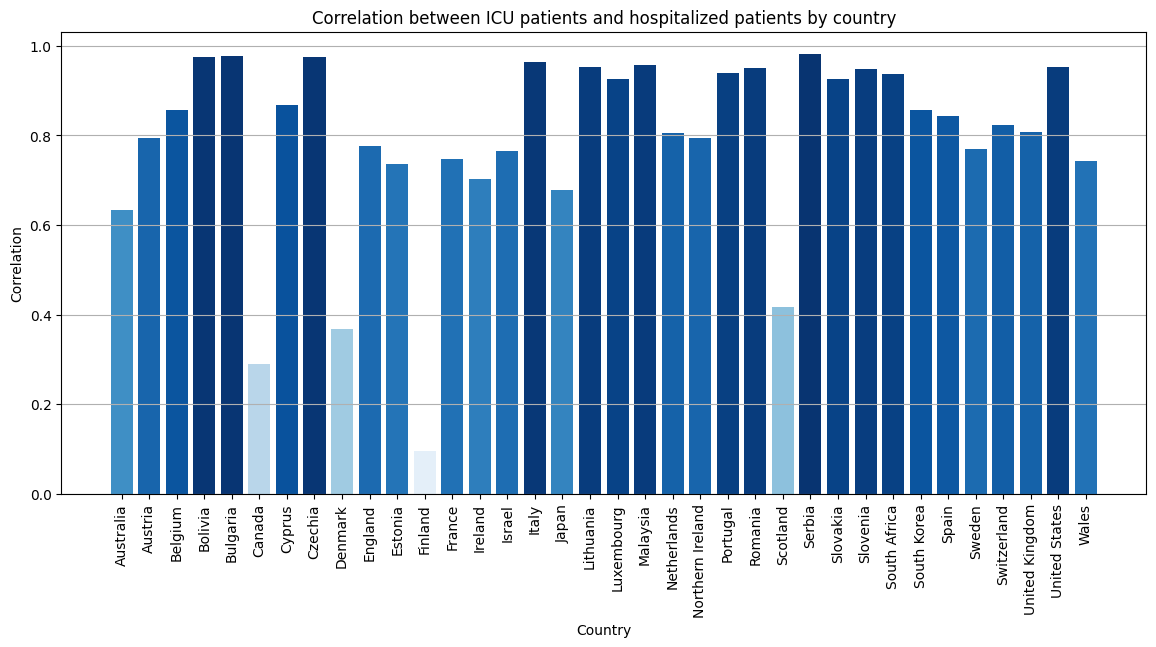

In [7]:
import matplotlib.pyplot as plt

colors = plt.cm.Blues(correlations.values)

# Plot the correlation as a bar plot
plt.figure(figsize=(14, 6))
plt.bar(correlations.index, correlations.values, color=colors)
# sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Correlation between ICU patients and hospitalized patients by country')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

As we can see the correlation between hospitalized and ICU patients in most countries is strong.

I've also plotted ICU patients and hospitalized patients in a scatter plot

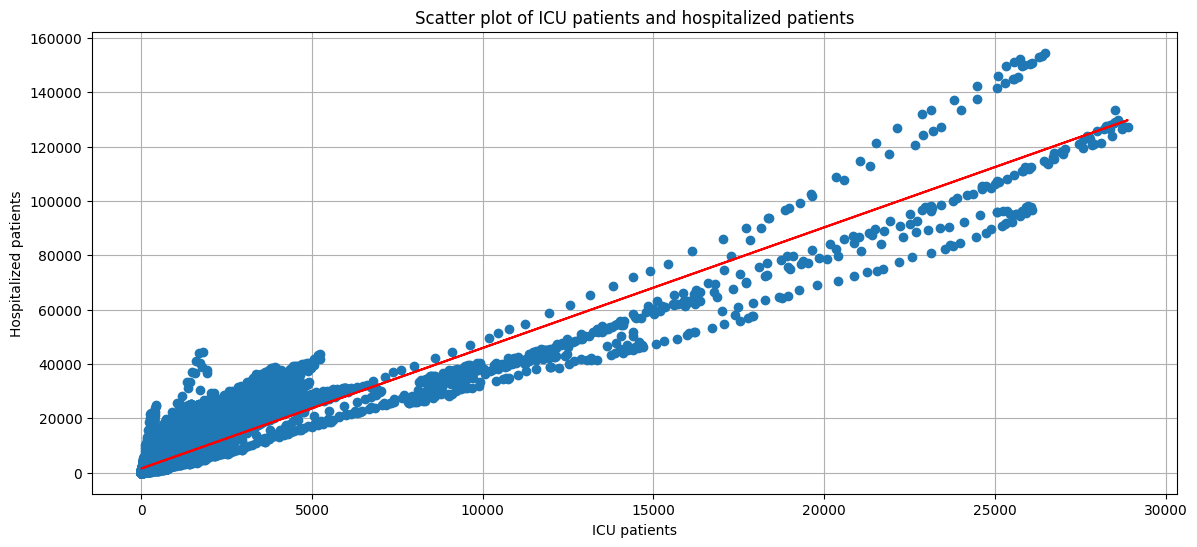

In [8]:
import numpy as np
m, b = np.polyfit(icu_hosp['icu_patients'], icu_hosp['hosp_patients'], 1)

plt.figure(figsize=(14, 6))

plt.plot(icu_hosp['icu_patients'], icu_hosp['hosp_patients'], 'o')
plt.plot(icu_hosp['icu_patients'], m * icu_hosp['icu_patients'] + b, color='red')

plt.title('Scatter plot of ICU patients and hospitalized patients')
plt.xlabel('ICU patients')
plt.ylabel('Hospitalized patients')
plt.grid()
plt.show()

As we can see there is a trend. The more ICU patients there are the more hospitalized patients there will be.

We can also visualize correlation between each country to find which countries correlate with other countries data.

First we define correlation matrix where each axis is country name. Then we spin up two loops that iterate over countries we merge the country data by date and if there are any values after merge then we calculate the correlation and put the value in the matrix.

In [9]:

import numpy as np

# Create a DataFrame to store the correlations of each country
correlation_matrix = pd.DataFrame(index=countries, columns=countries)

# Calculate the correlations between each pair of country
for icu in countries:
    for hosp in countries:
        # Calculate correlation between icu patients of one country hosp patients of other country hospitalized patients
        icu_country = icu_hosp[icu_hosp['location'] == icu]
        hosp_country = icu_hosp[icu_hosp['location'] == hosp]
        
        merged = pd.merge(icu_country, hosp_country, on='date', how='inner', suffixes=('_icu', '_hosp'))
        if len(merged) == 0:
            correlation_matrix.loc[icu, hosp] = 0
        else:
            correlation_matrix.loc[icu, hosp] = np.corrcoef(merged['icu_patients_icu'], merged['hosp_patients_hosp'])[0, 1]
        

We display the correlation matrix in a heatmap. In a heatmap blue color means negative correlation and red means positive correlation.

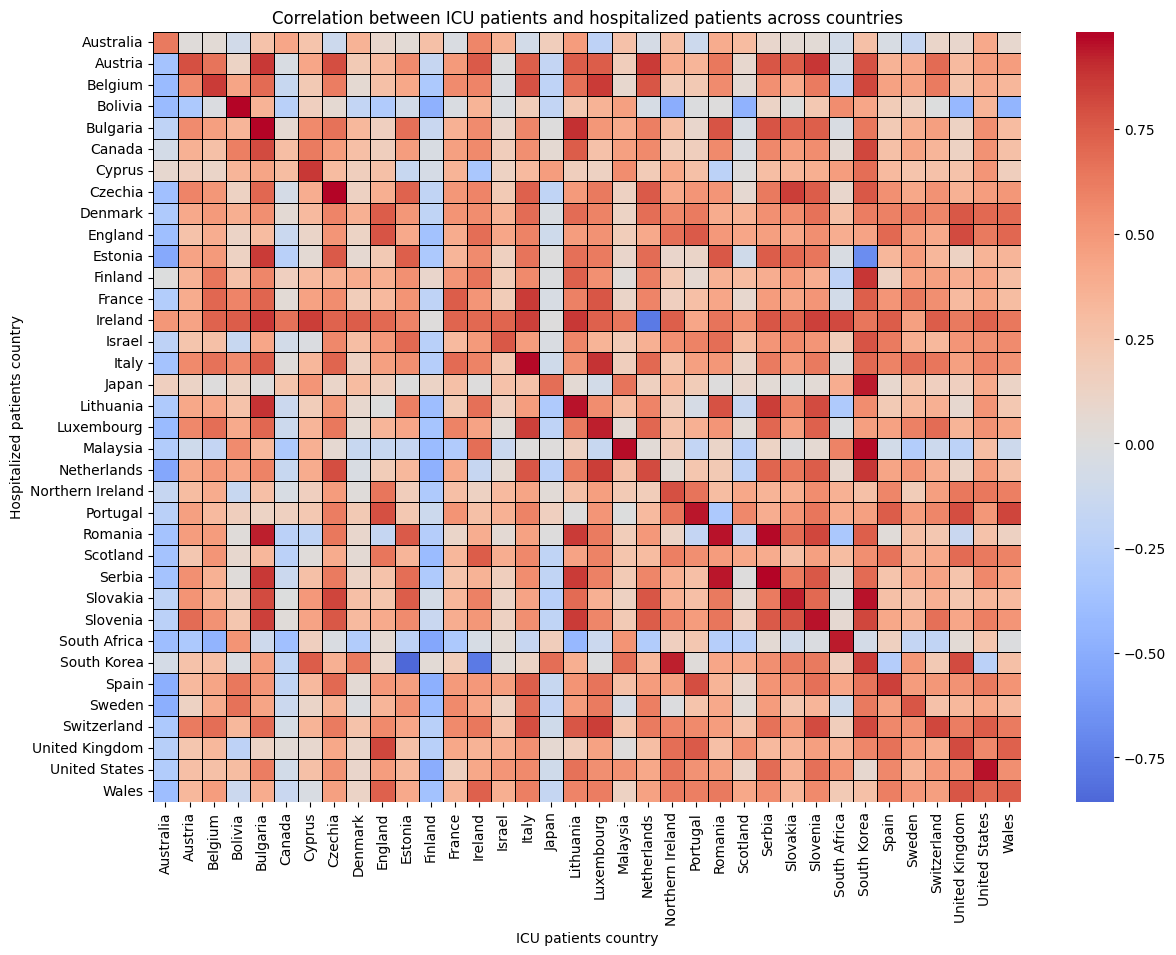

In [10]:
# Convert correlation matrix to numeric values
correlation_matrix = correlation_matrix.astype(float)
correlation_matrix.drop(columns=correlation_matrix.columns[(correlation_matrix == 0).all()], inplace=True)
correlation_matrix.drop(index=correlation_matrix.index[(correlation_matrix == 0).all(axis=1)], inplace=True)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title('Correlation between ICU patients and hospitalized patients across countries')
plt.xlabel('ICU patients country')
plt.ylabel('Hospitalized patients country')

# Show the plot
plt.show()

#### Conclusion

ICU patients and hospitalized patients correlate pretty well. In most cases values even correlate between different countries.

### Question 3
Can we predict ICU patients based on hospitalized patients and new cases?

First we prepare the data and create train, validation and test datasets.

In [11]:
from sklearn.model_selection import train_test_split

train_columns = ['hosp_patients', 'new_cases_smoothed']
target_columns = ['icu_patients']

# Specify taining and target dataframes
train_df = icu_hosp[train_columns].replace('', 0)
target_df = icu_hosp[target_columns].replace('', 0)

# Create train and test dataframes
X_train0, X_test, y_train0, y_test = train_test_split(train_df, target_df, test_size=0.2, random_state=16)
X_train, X_validation, y_train, y_validation = train_test_split(X_train0, y_train0, test_size=0.2, random_state=16)

#### Support vector machines
First we try to train a model on support vector machines.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, root_mean_squared_error

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

# Initialize the SVM
svm_model = SVR(kernel='linear')

# Train the Model
svm_model.fit(X_train_scaled, y_train.values.ravel())

# Make Predictions on the Test Set
y_pred = svm_model.predict(X_validation_scaled)

# Evaluate the Model
rmse = root_mean_squared_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

print(f"RMSE: {rmse}")
print(f"R squared score: {r2}")

RMSE: 1120.9221015928824
R squared score: 0.7286854303339403


Support vector machines model is ok bad but the error value is significant.

#### RandomForestRegressor
We will try another regression model from RandomForest to see how well this model performs.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Initialize and train a RandomForestRegressor
rf_model = RandomForestRegressor(random_state=4)
rf_model.fit(X_train, y_train.values.ravel())

# Make predictions
y_pred_rf = rf_model.predict(X_validation)

# Evaluate the model
rmse_rf = root_mean_squared_error(y_validation, y_pred_rf)
r2_rf = r2_score(y_validation, y_pred_rf)

print(f"RMSE: {rmse_rf}")
print(f"R squared score: {r2_rf}")

RMSE: 269.4279422688778
R squared score: 0.9843250010706444


This model achieves way better results with around 4 times lower RMSE. R squared tells us that the model fits our values very well. Around 98% of our target variantion which is ICU patients can be explained by new cases and hospitalized patients variations. 

#### Testing
We will test random forest regression model with test data that we defined earlier.

In [14]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE: {rmse_rf}")
print(f"R squared score: {r2_rf}")

RMSE: 290.44760190079
R squared score: 0.98499219699555


Here we will test our support vector machines model to see how well it performs with data that it have not seen.

In [15]:
X_test_scaled = scaler.transform(X_test)

# Make Predictions on the Test Set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the Model
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R squared score: {r2}")

RMSE: 1255.899618228375
R squared score: 0.7193975961627304


The RMSE of both models increased, this is expected, because it could be getting data that the model was not trained on.

#### Visualization
So we have the models and we have the errors. Now we can visualize the errors of random forest on a line chart. We get the errors by subtracting our predictions from the real values.

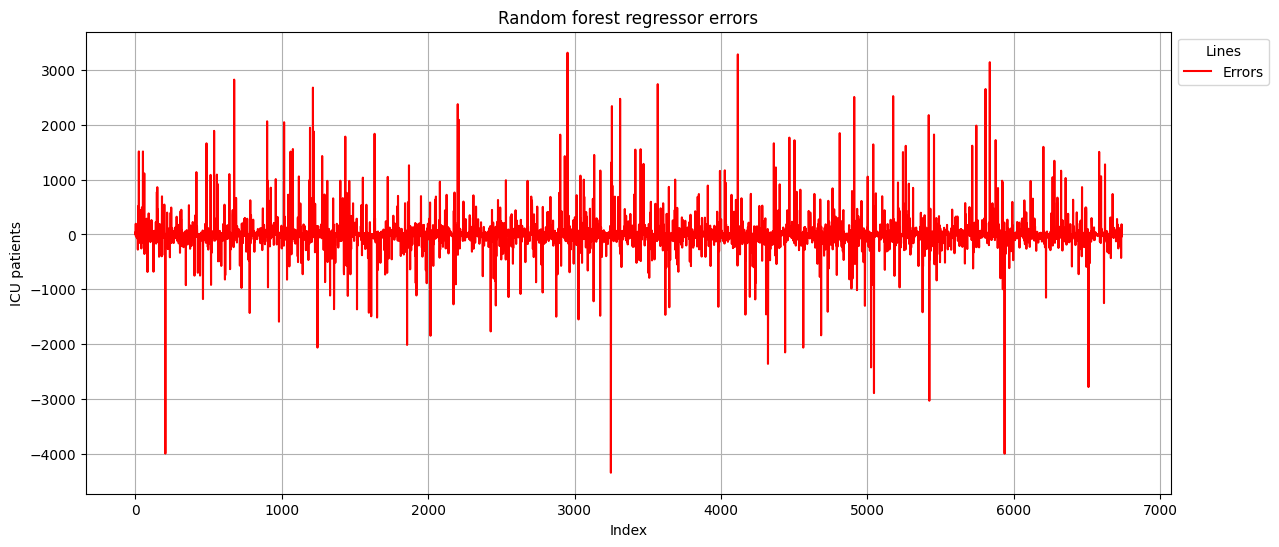

In [16]:
SIMPLIFY_BY = 1

x = range(0, len(y_test))
errors = y_test.to_numpy().T[0] - y_pred_rf

plt.figure(figsize=(14, 6))
plt.plot(x[::SIMPLIFY_BY], errors[::SIMPLIFY_BY], label='Errors', color='red')

# Add titles and labels
plt.title('Random forest regressor errors')
plt.xlabel('Index')
plt.ylabel('ICU patients')
plt.legend(title='Lines', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid()
# Show the plot
plt.show()

Here we visualize Support vector machines model errors on a line chart

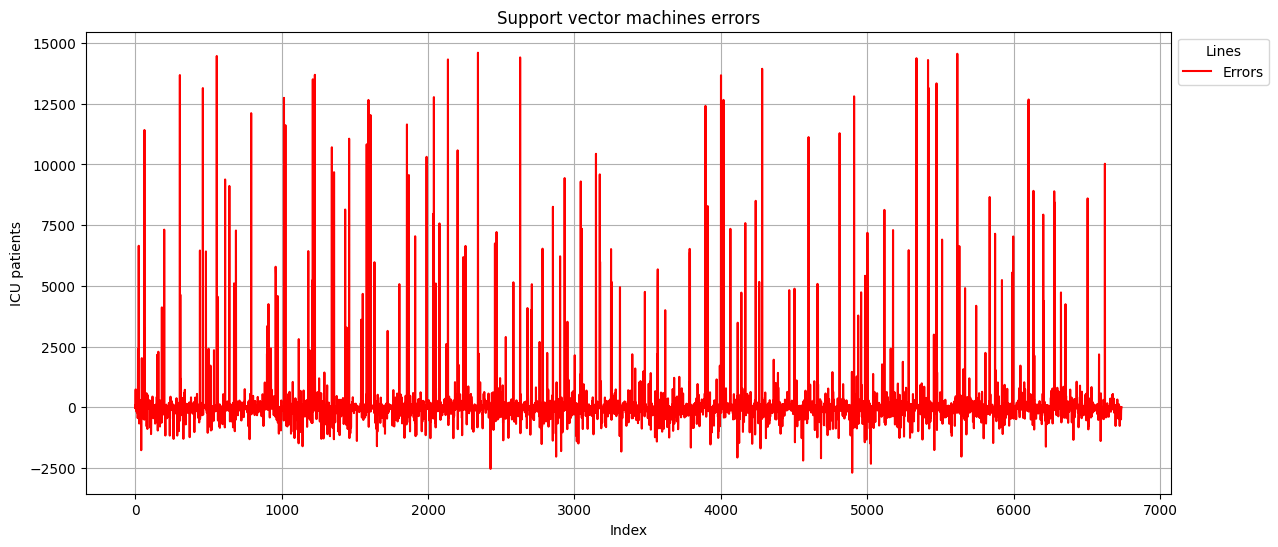

In [17]:
SIMPLIFY_BY = 1

x = range(0, len(y_test))
errors = y_test.to_numpy().T[0] - y_pred

plt.figure(figsize=(14, 6))
plt.plot(x[::SIMPLIFY_BY], errors[::SIMPLIFY_BY], label='Errors', color='red')

# Add titles and labels
plt.title('Support vector machines errors')
plt.xlabel('Index')
plt.ylabel('ICU patients')
plt.legend(title='Lines', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid()
# Show the plot
plt.show()

#### Conclusion
We can predict ICU patients based on hospitalized patients and new cases, but with an certain error. Using Random forest regression we can lower that error and get better results. 